# Credit Card Fraud Detection

# Problem Statement
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

The dataset is taken from the Kaggle website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.

# Business Problem Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

# Contents
.  1. Introduction

.  2. Importing the Packages

.  3. About the data

.  4. Exploratory Data Analysis

.  4.1 Time

.  4.2 Amount

.  4.3 Time vs. Amount

.  4.4 V1-V28

.  5.Feature Selection & Data Split

.  6. Modeling

.  7.1 Evaluation

.  7.2 F1 Score

.  7.3  Confusion Matrix

.  8. Understanding the confusion matrix

.  9. Conclusion

# 1.Introduction
In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

Each transaction has 30 features, all of which are numerical. The features V1, V2, ..., V28 are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount. The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.

# 2. Importing the Packages
For this project, our primary packages are going to be Pandas to work with data, NumPy to work with arrays, scikit-learn for data split, building and evaluating the classification models, and finally the xgboost package for the xgboost classifier model algorithm. Let’s import all of our primary packages into our python environment.

In [1]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import scipy as sp
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

# Plotting options
%matplotlib inline


# To see all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# 3.About the data:
The data are going to use is the Kaggle Credit Card Fraud Detection dataset . It contains features V1 to V28 which are the principal components obtained by PCA. We are going to neglect the time feature which is of no use to build the models. The remaining features are the ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’ feature that contains whether the transaction is a fraud case or not. Now let’s import the data using the ‘read_csv’ method and print the data to have a look at it in python.

In [2]:
# Importing the data sets
df = pd.read_csv("C:\\Users\\Hp\\Documents\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Are there any variables with missing data?

In [4]:
df.isnull().any().any()

False

How balanced are the classes, i.e. how common are fraudulent transactions?

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Only 0.17% (492 out of 284,807) transactions are fraudulent.

# 4. Exploratory Data Analysis
We conduct EDA only on the training set, and leave the test set unknown.

# 4.1 Time
Few descriptive statistics for the Time variable:

In [7]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Let's convert the time from seconds to hours to ease the interpretation.

In [8]:
df.loc[:,'Time'] = df.Time / 3600


What is the time of the last transaction, in days?

In [9]:
df['Time'].max() / 24

1.9999074074074075

So the transactions indeed occur over a two-day period. Next let's plot a histogram of transaction times, with one bin per hour:

Text(0.5, 1.0, 'Transaction Times')

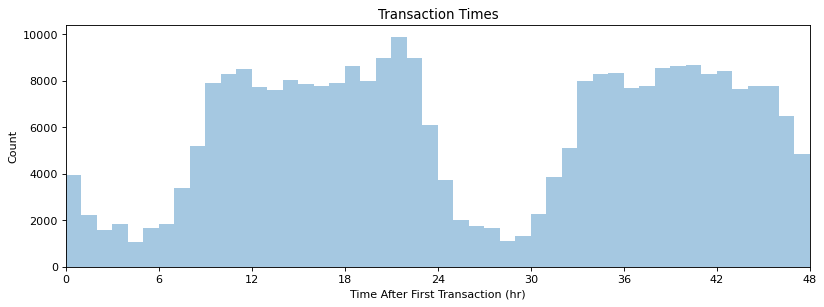

In [10]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

It looks like there are two lulls in credit card transactions during nighttime on each day

# 4.2 Amount
Summary statistics:

In [11]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Comparing the different quantiles, it looks like the amounts are very right-skewed. To verify this, plot a histogram of the transaction amounts:

Text(0.5, 1.0, 'Transaction Amounts')

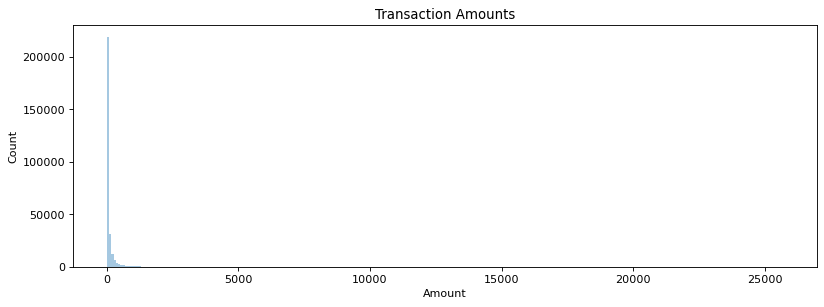

In [12]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers

Text(0.5, 1.0, 'Transaction Amounts')

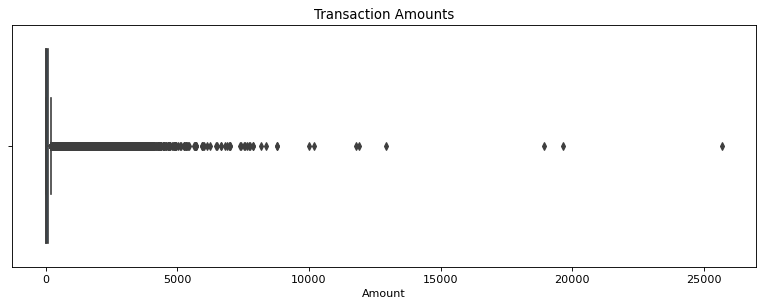

In [13]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['Amount'])
plt.title('Transaction Amounts')

We can see there are no outliers on the left and many outliers on the right. So the amounts certainly seem right-skewed. We can calculate the skewness to be sure:

In [14]:
df['Amount'].skew()

16.977724453761024

That's a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution. We'll use the Box-Cox transform in SciPy, but some of the amounts are zero (min = 0 above), so we need to shift the amounts first to make them positive. We'll shift by a very small amount, just  10−9 .

In [15]:
df.loc[:,'Amount'] = df['Amount'] + 1e-9 # Shift all amounts by 1e-9

Perform the Box-Cox transform:

In [16]:
df.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(df['Amount'], alpha=0.01)

The maximum likelihood estimate of  𝜆  in the Box-Cox transform:

In [17]:
maxlog

0.13392240552999146

The 99% confidence interval for  𝜆 :

In [18]:
(min_ci, max_ci)

(0.132621597858576, 0.13523057944346129)

Plot the newly transformed amounts:

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

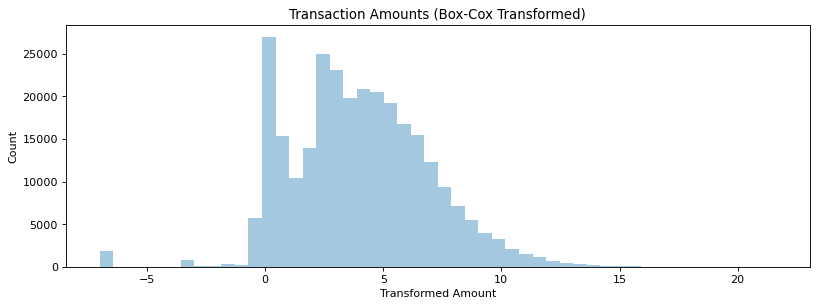

In [19]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

Much better. The distribution appears to be bimodal, suggesting a divide between "small" and "large" purchases. Now let's check the descriptive stats of the transformed amounts:

In [20]:
df['Amount'].describe()

count    284807.000000
mean          3.977690
std           2.961936
min          -7.001590
25%           1.937710
50%           3.829056
75%           5.896318
max          21.621106
Name: Amount, dtype: float64

What's the skewness of the transformed amounts? (Zero skewness would be ideal.)

In [21]:
df['Amount'].skew()

0.1153579081322187

So our power transform removed most of the skewness in the Amount variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the  𝜆  value estimated on the training data.

# 4.3 Time vs. Amount
Is there a relationship between the transaction amounts and the time of day? Let's explore this question with a joint histogram using hexagonal bins. For this plot, we convert each transaction time to the hour of the day on which it occurred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


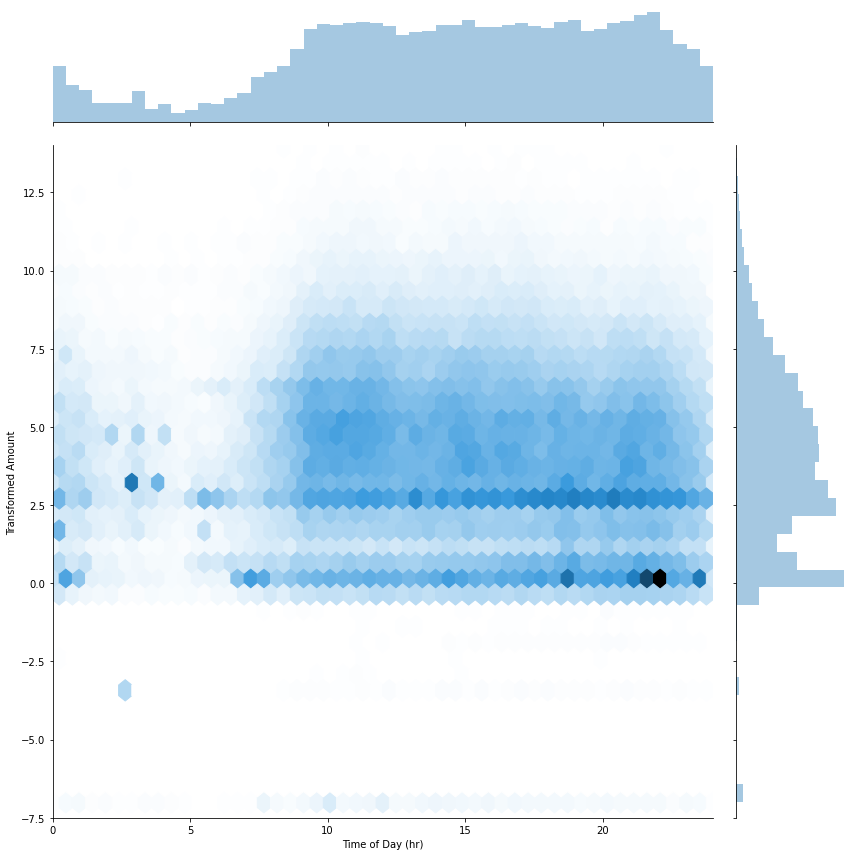

In [22]:
sns.jointplot(df['Time'].apply(lambda x: x % 24), df['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

The transaction amounts appear to be similarly distributed throughout the daytime hours. However, in the earliest hours of the day, around 5-7 AM, amounts around 2.5 are the most common (recall this is a Box-Cox transformed value). Perhaps everyone's buying their morning coffee?

# 4.4 V1-V28
Let's compare the descriptive stats of the PCA variables V1-V28.

In [23]:
pca_vars = ['V%i' % k for k in range(1,29)]

Full table of descriptive stats:

In [24]:
df[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


It's tedious to interpret this table, so let's make some visualizations. We'll start by plotting the means:

Text(0.5, 1.0, 'V1-V28 Means')

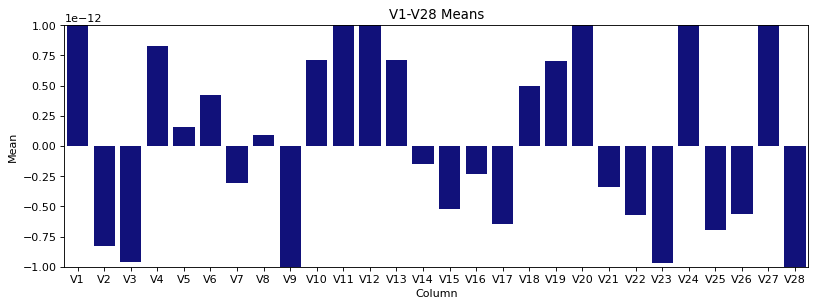

In [26]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

All of V1-V28 have approximately zero mean. Now plot the standard deviations:

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

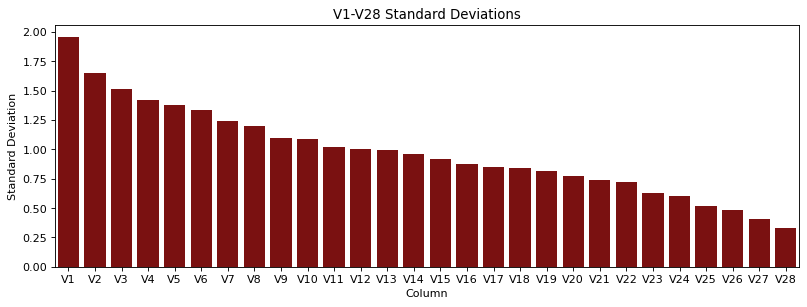

In [27]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9. Plot the skewnesses next:

Text(0.5, 1.0, 'V1-V28 Skewnesses')

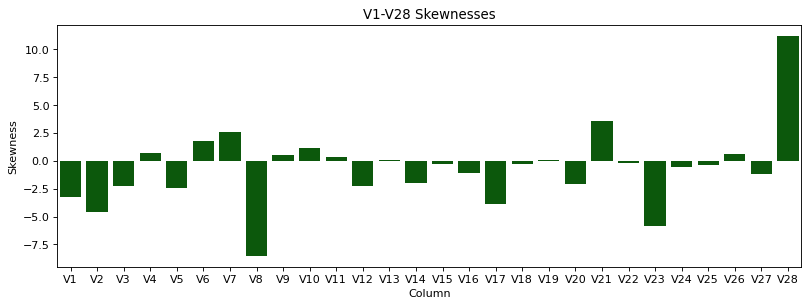

In [28]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')

A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.

Text(0.5, 1.0, 'V8')

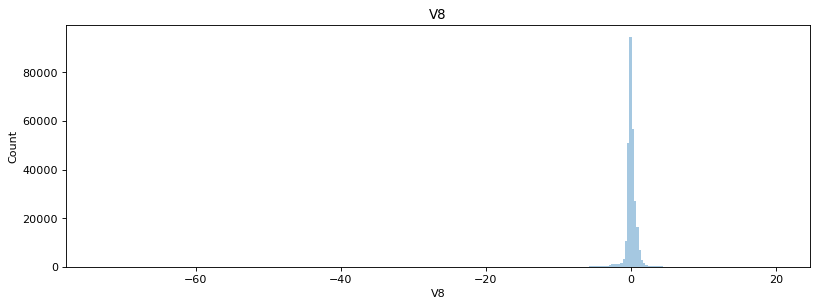

In [29]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')

The histogram doesn't show us outliers. Let's try a boxplot

Text(0.5, 1.0, 'V8')

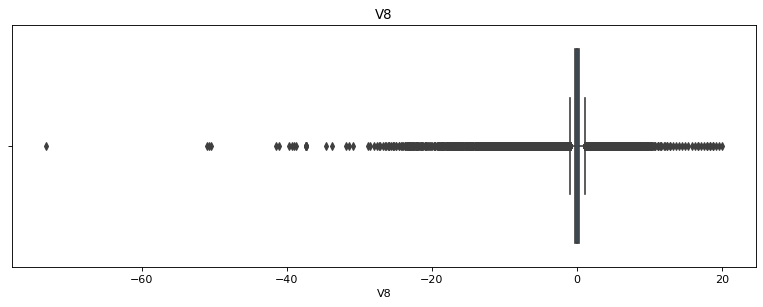

In [30]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['V8'])
plt.title('V8')

The boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in V8. This motivates us to plot the kurtoses of the PCA variables. The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0.

Note the log scale on the y-axis in the plot below:

Text(0.5, 1.0, 'V1-V28 Kurtoses')

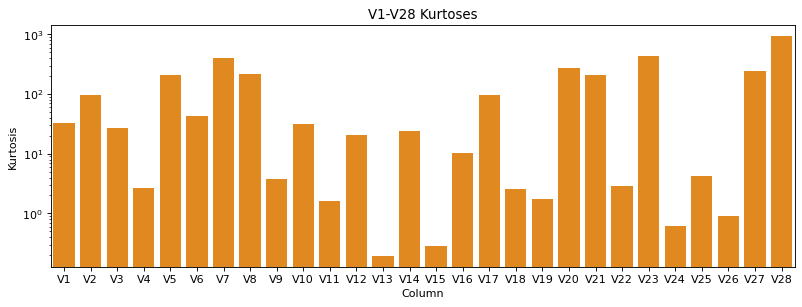

In [31]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=df[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

We've learned that many of the PCA variables are heavy-tailed. The large numbers of outliers in V1-V28 motivates us to consider robust descriptive statistics. Let's plot the medians:

Text(0.5, 1.0, 'V1-V28 Medians')

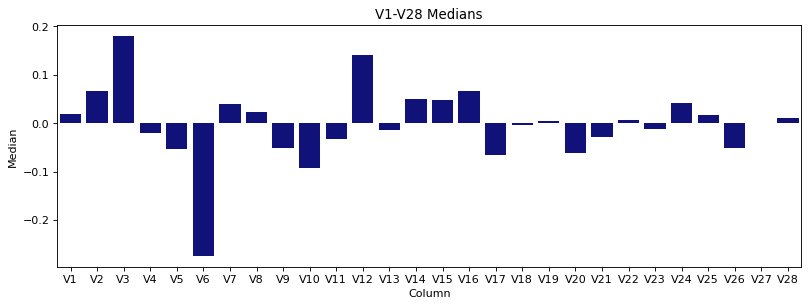

In [32]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

The medians are also roughly zero. Next let's look at the interquartile ranges (IQR)*:

*Pandas does not have a built-in IQR method, but we can use the quantile method to calculate the IQR.

Text(0.5, 1.0, 'V1-V28 IQRs')

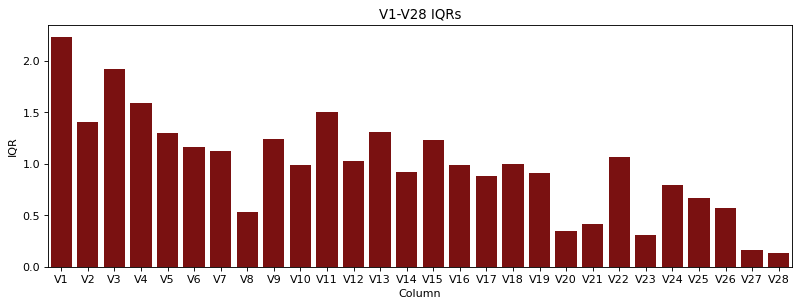

In [33]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].quantile(0.75) - df[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

Th:e IQRs of V1-V28 are on a similar scale as the standard deviations:

In [34]:
df.drop('Time', axis = 1, inplace = True)

# 5. Feature Selection & Data Split
In this process, we are going to define the independent (X) and the dependent variables (Y). Using the defined variables, we will split the data into a training set and testing set which is further used for modeling and evaluating. We can split the data easily using the ‘train_test_split’ algorithm in python.

Now that all the required components to build our classification models. So let’s proceed to it

In [35]:
X = df.drop('Class', axis = 1).values # Features
y = df['Class'].values                # Targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [36]:
X_train.shape

(227845, 29)

In [37]:
X_test.shape

(56962, 29)

# 6. Modeling
Now we're ready to build machine learning models to predict whether a transaction is fraudulent. We'll train the following models:

In this step, we will be building six different types of classification models namely Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), Random Forest, and XGBoost. Even though there are many more models which we can use, these are the most popular models used for solving classification problems. All these models can be built feasibly using the algorithms provided by the scikit-learn package. Only for the XGBoost model, we are going to use the xgboost package. Let’s implement these models in python and keep it in mind that the algorithms used might take time to get implemented.

In [38]:
# MODELING

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4,use_label_encoder=False)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

[19:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In the above code, we have built six different types of classification models starting from the Decision tree model to the XGBoost model. Now let’s breakdown the code.

Starting with the decision tree, we have used the ‘DecisionTreeClassifier’ algorithm to build the model. Inside the algorithm, we have mentioned the ‘max_depth’ to be ‘4’ which means we are allowing the tree to split four times and the ‘criterion’ to be ‘entropy’ which is most similar to the ‘max_depth’ but determines when to stop splitting the tree. Finally, we have fitted and stored the predicted values into the ‘tree_yhat’ variable.

Next is the K-Nearest Neighbors (KNN). We have built the model using the ‘KNeighborsClassifier’ algorithm and mentioned the ‘n_neighbors’ to be ‘5’. The value of the ‘n_neighbors’ is randomly selected but can be chosen optimistically through iterating a range of values, followed by fitting and storing the predicted values into the ‘knn_yhat’ variable. There is nothing much to explain about the code for Logistic regression as we kept the model in a way more simplistic manner by using the ‘LogisticRegression’ algorithm and as usual, fitted and stored the predicted variables in the ‘lr_yhat’ variable. We built the Support Vector Machine model using the ‘SVC’ algorithm and we didn’t mention anything inside the algorithm as we managed to use the default kernel which is the ‘rbf’ kernel. After that, we stored the predicted values into the ‘svm_yhat’ after fitting the model.

The next model is the Random forest model which we built using the ‘RandomForestClassifier’ algorithm and we mentioned the ‘max_depth’ to be 4 just like how we did to build the decision tree model. Finally, fitting and storing the values into the ‘rf_yhat’. Remember that the main difference between the decision tree and the random forest is that, decision tree uses the entire dataset to construct a single model whereas, the random forest uses randomly selected features to construct multiple models. That’s the reason why the random forest model is used versus a decision tree.

Our final model is the XGBoost model. We built the model using the ‘XGBClassifier’ algorithm provided by the xgboost package. We mentioned the ‘max_depth’ to be 4 and finally, fitted and stored the predicted values into the ‘xgb_yhat’. With that, we have successfully built our six types of classification models and interpreted the code for easy understanding. Our next step is to evaluate each of the models and find which is the most suitable one for our case.

# 7.Evaluation
As I said before, in this process we are going to evaluate our built models using the evaluation metrics provided by the scikit-learn package. Our main objective in this process is to find the best model for our given case. The evaluation metrics we are going to use are the accuracy score metric, f1 score metric, and finally the confusion matrix.

Accuracy score
Accuracy score is one of the most basic evaluation metrics which is widely used to evaluate classification models. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions made by the model (can be multiplied by 100 to transform the result into a percentage). It can generally be expressed as: Accuracy score = No.of correct predictions / Total no.of predictions Let’s check the accuracy score of the six different classification models we built. To do it in python, we can use the ‘accuracy_score’ method provided by the scikit-learn package. Python Implementation:

# 7.1 Accuracy score

In [42]:
#  Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9992099996488887
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992802219023208
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994908886626171
------------------------------------------------------------------------


According to the accuracy score evaluation metric, the KNN model reveals to be the most accurate model and the Logistic regression model to be the least accurate model. However, when we round up the results of each model, it shows 0.99 (99% accurate) which is a very good score.

# 7.2 F1 Score
The F1 score or F-score is one of the most popular evaluation metrics used for evaluating classification models. It can be simply defined as the harmonic mean of the model’s precision and recall. It is calculated by dividing the product of the model’s precision and recall by the value obtained on adding the model’s precision and recall and finally multiplying the result with 2. It can be expressed as: F1 score = 2( (precision * recall) / (precision + recall) ) The F1 score can be calculated easily in python using the ‘f1_score’ method provided by the scikit-learn package.

In [40]:
# F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))


F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.8586387434554974
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7398843930635838
------------------------------------------------------------------------
F1 score of the SVM model is 0.8043478260869565
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7657142857142858
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8449197860962566
------------------------------------------------------------------------


The ranking of the models is almost similar to the previous evaluation metric. On basis of the F1 score evaluation metric, the KNN model snatches the first place again and the Logistic regression model remains to be the least accurate model.

# 7.3 Confusion Matrix
Typically, a confusion matrix is a visualization of a classification model that shows how well the model has predicted the outcomes when compared to the original ones. Usually, the predicted outcomes are stored in a variable that is then converted into a correlation table. Using the correlation table, the confusion matrix is plotted in the form of a heatmap. Even though there are several built-in methods to visualize a confusion matrix, we are going to define and visualize it from scratch for better understanding. Let’s do it in python!

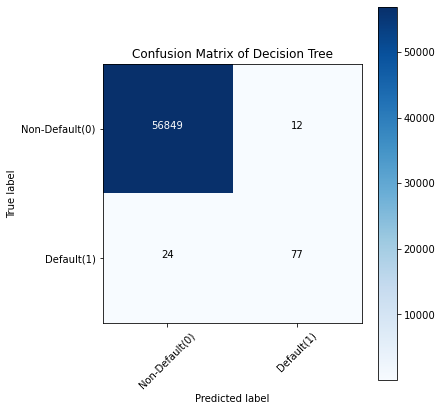

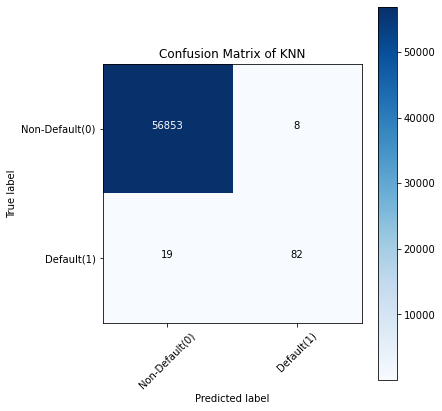

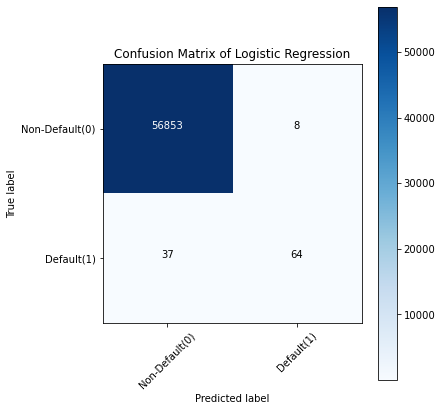

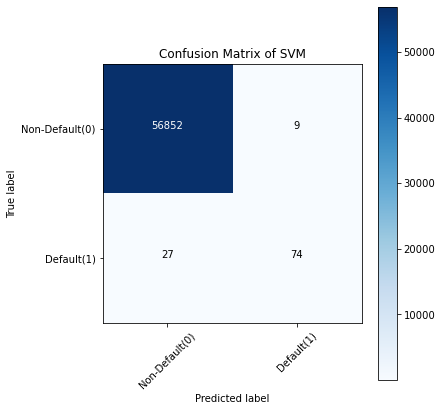

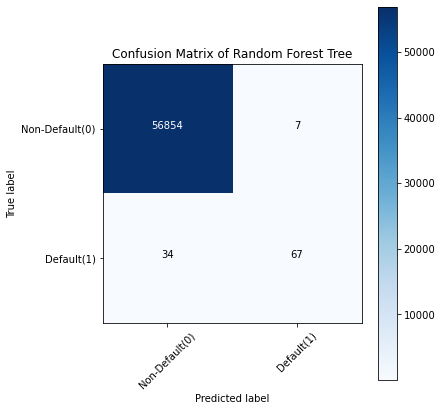

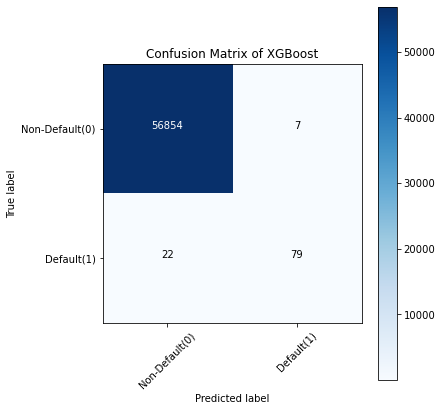

In [41]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()



 # 8. Understanding the confusion matrix:
Let’s take the confusion matrix of the XGBoost model as an example. Look at the first row. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56854 of them as 0 and 7 of them as 1. It means, for 56854 non-fraud transactions, the actual churn value was 0 in the test set, and the classifier also correctly predicted those as 0.

say that our model has classified the non-fraud transactions pretty well. Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 79 of them as 1, and 22 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model.

Like this, while comparing the confusion matrix of all the models, it can be seen that the K-Nearest Neighbors model has performed a very good job of classifying the fraud transactions from the non-fraud transactions followed by the XGBoost model. So we can conclude that the most appropriate model which can be used for our case is the K-Nearest Neighbors model and the model which can be neglected is the Logistic regression model.

# 9. Conclusion
We were able to accurately identify fraudulent credit card transactions using a machine learning models. We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11. Only a few preprocessing steps were necessary before constructing predictive models:

.Split the data using a random, stratified train/test split with a test size of 20%

.Box-Cox power transform of the transaction amounts to remove skewness in the data

.Mean and variance standardization of all features as part of a machine learning pipeline
To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.

After a whole bunch of processes, we have successfully built six different types of classification models starting from the Decision tree model to the XGBoost model. After that, we have evaluated each of the models using the evaluation metrics and chose which model is most suitable for the given case. And you can feel happy about yourself as you have come across and successfully finished one of the most famous financial data science projects. In this article, we have limited our model count to six but, there are many more models to explore. Also, we have built the models feasibly in python but, there are more and more math and statistics behind each of the models. 